In [53]:
import numpy as np
from typing import Tuple
from tqdm.auto import tqdm

In [54]:
from maze import Maze

# Constants
GAME_HEIGHT = 600
GAME_WIDTH = 600
NUMBER_OF_TILES = 25
SCREEN_HEIGHT = 700
SCREEN_WIDTH = 700
TILE_SIZE = GAME_HEIGHT // NUMBER_OF_TILES

# Maze layout
level = [
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
    "X XXXXXXXX          XXXXX",
    "X XXXXXXXX  XXXXXX  XXXXX",
    "XP     XXX  XXXXXX  XXXXX",
    "X      XXX  XXX         X",
    "XXXXXX  XX  XXX        XX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "X  XXX      XXXXXXXXXXXXX",
    "X  XXX  XXXXXXXXXXXXXXXXX",
    "X         XXXXXXXXXXXXXXX",
    "X             XXXXXXXXXXX",
    "XXXXXXXXXXX      XXXXX  X",
    "XXXXXXXXXXXXXXX  XXXXX  X",
    "XXX  XXXXXXXXXX         X",
    "XXX                     X",
    "XXX         XXXXXXXXXXXXX",
    "XXXXXXXXXX  XXXXXXXXXXXXX",
    "XXXXXXXXXX              X",
    "XX   XXXXX              X",
    "XX   XXXXXXXXXXXXX  XXXXX",
    "XX    XXXXXXXXXXXX  XXXXX",
    "XX        XXXX          X",
    "XXXX                    X",
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
]

env = Maze(
    level,
    goal_pos=(23, 20),
    MAZE_HEIGHT=GAME_HEIGHT,
    MAZE_WIDTH=GAME_WIDTH,
    SIZE=NUMBER_OF_TILES,
)

NO_OF_ACTIONS = 4

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_policy(probs_or_qvals, action_meanings=None):
    if action_meanings is None:
        action_meanings = {0: 'L', 1: 'U', 2: 'R', 3: 'D'}
    fig = plt.figure(figsize=(7,7))
    max_prob_actions = probs_or_qvals.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(np.object)
    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]
    sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False, cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2)
    plt.axis("off")
    plt.suptitle("Policy", size=24)
    plt.tight_layout()

In [56]:
action_values = np.zeros((env.number_of_tiles, env.number_of_tiles, NO_OF_ACTIONS))
# action_values = np.full((env.number_of_tiles, env.number_of_tiles, NO_OF_ACTIONS), -100)
# # set action value for goal state to 0
# action_values[env.goal_pos]=0


In [57]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [58]:
import numpy as np
def exploratory_policy(state, epsilon):

    # return np.random.randint(NO_OF_ACTIONS)
    if np.random.rand() < epsilon:
        return np.random.choice(NO_OF_ACTIONS)
    
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [59]:
def q_learning(action_values, target_policy, exploratory_policy, alpha = 0.2, gamma = 0.99, episodes = 1000, epsilon = 0.4):
    
    for _ in tqdm(range(episodes)):
        state = env.reset_state()
        done = False

        while not done: 
            action = exploratory_policy(state, epsilon)
            next_state, reward, done = env.simulate_step(state, action)
            next_action = target_policy(next_state)
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state


In [60]:
q_learning(action_values, target_policy, exploratory_policy)

  0%|          | 0/1000 [00:00<?, ?it/s]

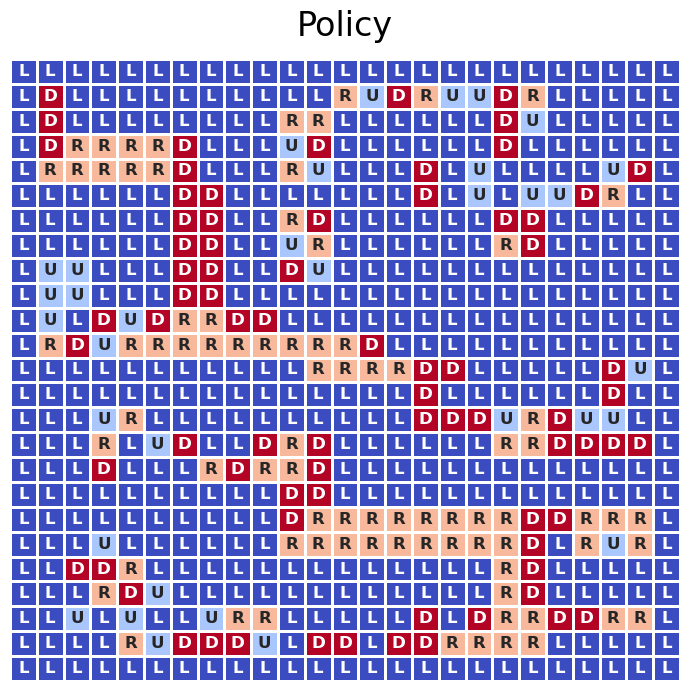

In [61]:
plot_policy(action_values)